# <div style="text-align: left; background-color:#45C7EF; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">KHÁM PHÁ DỮ LIỆU TRÊN TẬP DỮ DIỆU BIGDS</div>

📝 Import các thư viện cần thiết

In [601]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from pathlib import Path  

📝 Đọc file BigDS.csv và in ra 5 dòng đầu tiên của bộ dữ liệu

In [602]:
df_BigDS = pd.read_csv('./raw_data/BigDS.csv')
table = tabulate(df_BigDS, headers='keys', tablefmt='fancy_grid')
print(table)

╒══════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╤════════════════════════════════════════════════════╤════════════╤════════════════╤════════════════════╤════════════╤═══════════════╤══════════╤═══════════════════╤════════════════════╤════════════════╤════════════╤═══════════╕
│      │ DiaChi                                                                                                                                                                                           │ GiaBan          │ DuAn                                               │ DienTich   │ TinhTrangBDS   │ Gia/m2             │ PhongNgu   │ PhongVeSinh   │   SoTang │ TinhTrangGiayTo   │ TinhTrangNoiThat   │ HuongBanCong   │ HuongCua   │ DacDiem   │
╞══════╪══════════════════════════════════════════════════════════════════════════════════════════════

📝 Số dòng và số cột của bộ dữ liệu

In [554]:
ds_rows, ds_cols = df_BigDS.shape
print(f'Số hàng: {ds_rows}\nSố cột: {ds_cols}')

Số hàng: 8542
Số cột: 14


📝 Hiển thị kiểu dữ liệu và số lượng của từng cột trong bộ dữ liệu

In [555]:
df_BigDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8542 entries, 0 to 8541
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            8542 non-null   object 
 1   GiaBan            8542 non-null   object 
 2   DuAn              6202 non-null   object 
 3   DienTich          8542 non-null   object 
 4   TinhTrangBDS      8542 non-null   object 
 5   Gia/m2            8542 non-null   object 
 6   PhongNgu          8542 non-null   object 
 7   PhongVeSinh       7169 non-null   object 
 8   SoTang            2520 non-null   float64
 9   TinhTrangGiayTo   2593 non-null   object 
 10  TinhTrangNoiThat  1835 non-null   object 
 11  HuongBanCong      1303 non-null   object 
 12  HuongCua          1969 non-null   object 
 13  DacDiem           345 non-null    object 
dtypes: float64(1), object(13)
memory usage: 934.4+ KB


📝 Xem số lượng giá trị duy nhất trong mỗi cột

In [556]:
print(df_BigDS.nunique())

DiaChi              2350
GiaBan              1138
DuAn                 563
DienTich             602
TinhTrangBDS           2
Gia/m2              3623
PhongNgu              10
PhongVeSinh            6
SoTang                46
TinhTrangGiayTo        3
TinhTrangNoiThat       4
HuongBanCong           8
HuongCua               8
DacDiem                1
dtype: int64


📝 Kiểm tra xem có dòng nào bị lặp không

In [557]:
num_duplicated_rows = df_BigDS.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
print(is_duplicated)

So dong lap la 0
False


📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'Gia/m2' của DataFrame 'df_BigDS'

In [558]:
num_NaN = df_BigDS['Gia/m2'].isnull().sum()
num_NaN

0

📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'PhongVeSinh' của DataFrame 'df_BigDS'

In [559]:
#Đếm số lượng giá trị thiếu (NaN) trong cột 'PhongVeSinh' của DataFrame 'df_BigDS'
num_NaN = df_BigDS['PhongVeSinh'].isnull().sum()
num_NaN

1373

📝 Biểu đồ ma trận

<AxesSubplot:>

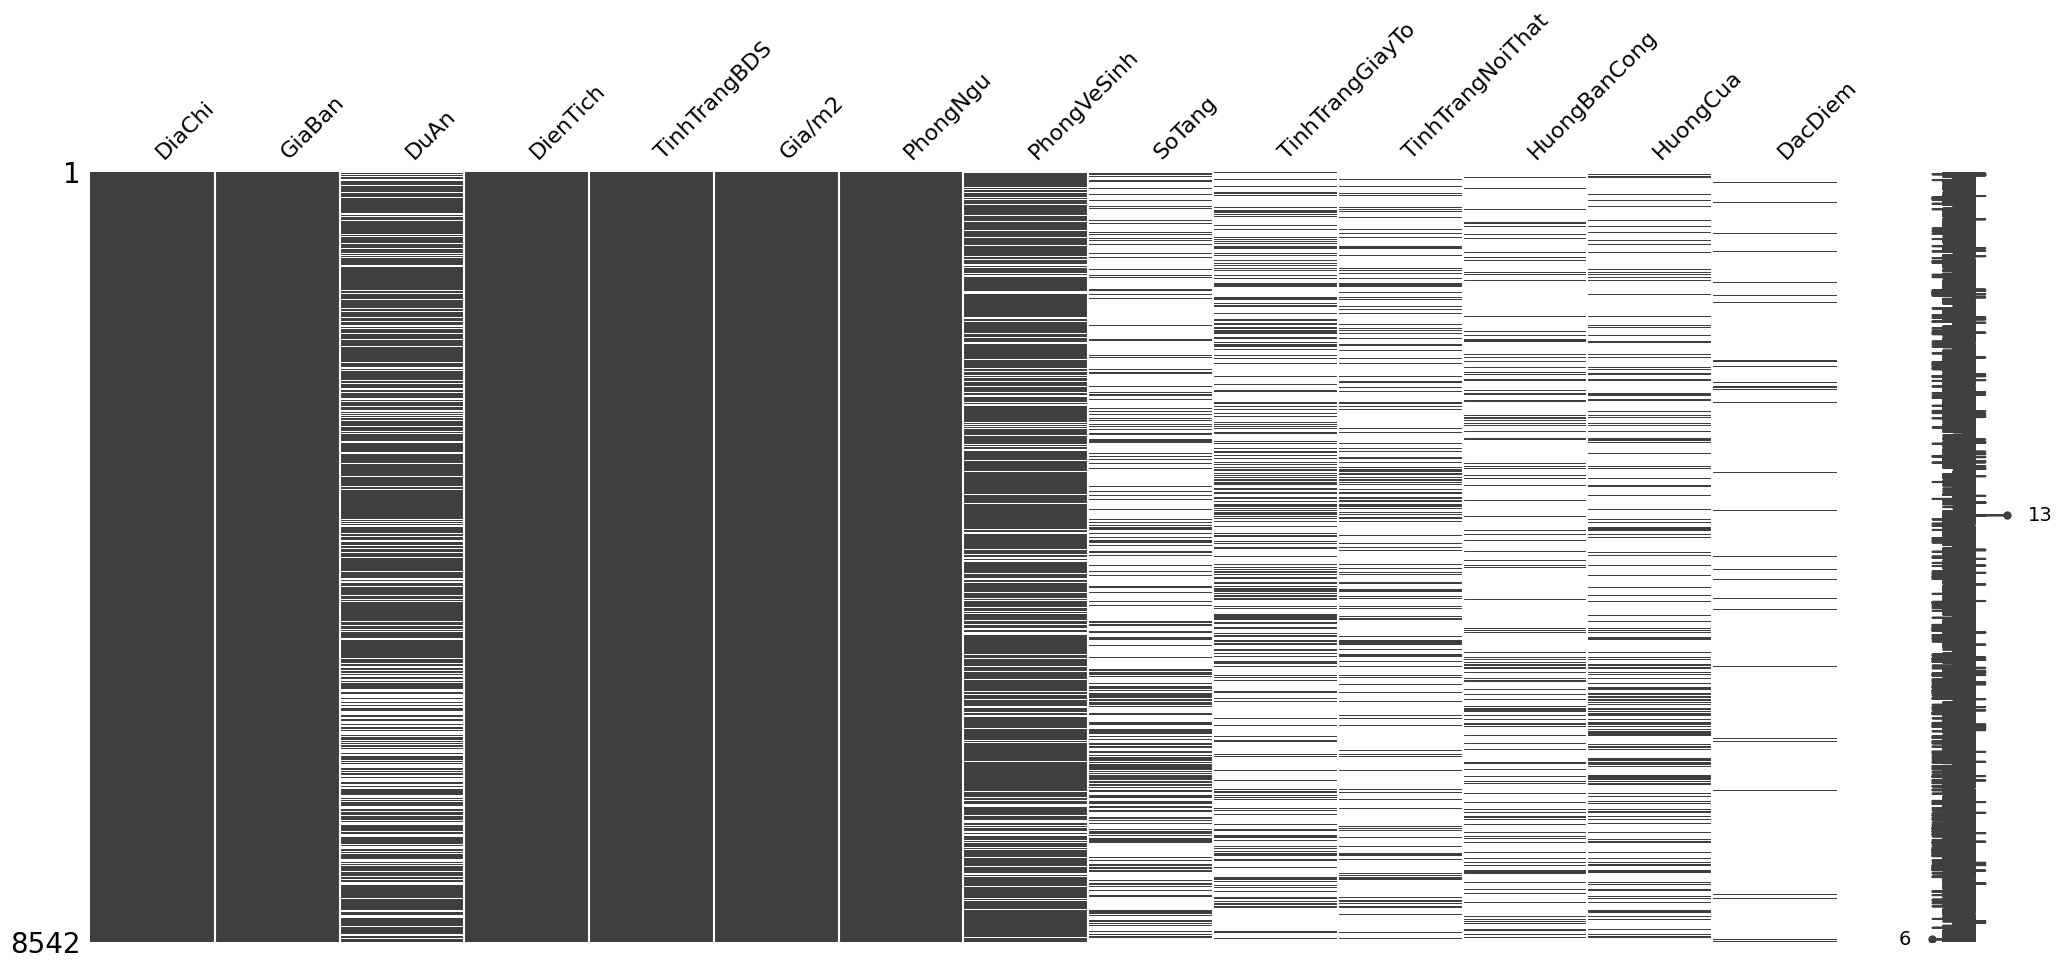

In [560]:
import missingno as msno

msno.matrix(df_BigDS)

📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'Gia/m2' của DataFrame 'df_BigDS'

In [561]:
missing_ratio = df_BigDS.isnull().sum()
missing_ratio = missing_ratio / ds_rows
missing_ratio

DiaChi              0.000000
GiaBan              0.000000
DuAn                0.273941
DienTich            0.000000
TinhTrangBDS        0.000000
Gia/m2              0.000000
PhongNgu            0.000000
PhongVeSinh         0.160735
SoTang              0.704987
TinhTrangGiayTo     0.696441
TinhTrangNoiThat    0.785179
HuongBanCong        0.847460
HuongCua            0.769492
DacDiem             0.959611
dtype: float64

📝 Tỉ lệ giá trị thiếu trong mỗi cột

In [562]:
missing_ratio = df_BigDS.isnull().sum() / len(df_BigDS) * 100
missing_ratio_df = pd.DataFrame(missing_ratio, columns=['Missing Ratio'])
styled_missing_ratio = missing_ratio_df.style\
    .apply(lambda x: ['background: #89C6E9; color: black' if v > 0 else '' for v in x],
           axis=0)
# Hiển thị tỷ lệ giá trị thiếu với màu và chữ đen
print("Tỷ lệ giá trị thiếu trong mỗi cột:")
styled_missing_ratio

Tỷ lệ giá trị thiếu trong mỗi cột:


📝 Thống kê mô tả của từng cột

In [563]:
description = df_BigDS.describe()
styled_description = description.style\
    .set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description


In [564]:
cate_col_df = df_BigDS.select_dtypes(exclude=['float64', 'float32', 'int64', 'int32'])
# Thống kê mô tả của các cột không phải số
description = cate_col_df.describe()
styled_description = description.style\
    .set_properties(**{'background-color':'#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description

In [565]:
def missing_ratio(df_BigDS):
    return (df_BigDS.isna().mean() * 100).round(1)
def num_values(df_BigDS):
    return df_BigDS.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df_BigDS.agg([missing_ratio, num_values, value_ratios])

DiaChi  \
missing_ratio                                                0.0   
num_values                                                  2350   
value_ratios   {'Nguyễn Xiển, Phường Long Thạnh Mỹ (Quận 9 cũ...   

                                                          GiaBan  \
missing_ratio                                                0.0   
num_values                                                  1138   
value_ratios   {'2,5 tỷ': 2.0, '2,1 tỷ': 1.8, '2,7 tỷ': 1.7, ...   

                                                            DuAn  \
missing_ratio                                               27.4   
num_values                                                   563   
value_ratios   {'Vinhomes Grand Park': 3.4, 'Saigon Riverside...   

                                                        DienTich  \
missing_ratio                                                0.0   
num_values                                                   602   
value_ratios   {'70 m²': 4.0, '1 m²': 3.6, '65 m²': 3.3, '75 ...   

                                               TinhTrangBDS  \
missing_ratio                                           0.0   
num_values                                                2   
value_ratios   {'Đã bàn giao': 78.1, 'Chưa bàn giao': 21.9}   

                                                          Gia/m2  \
missing_ratio                                                0.0   
num_values                                                  3623   
value_ratios   {'50 triệu/m²': 0.7, '40 triệu/m²': 0.7, '30 t...   

                                                        PhongNgu  \
missing_ratio                                                0.0   
num_values                                                    10   
value_ratios   {'2 phòng': 68.2, '3 phòng': 16.5, '1 phòng': ...   

                                                     PhongVeSinh  \
missing_ratio                                               16.1   
num_values                                                     6   
value_ratios   {'2 phòng': 69.2, '1 phòng': 26.3, '3 phòng': ...   

                                                          SoTang  \
missing_ratio                                               70.5   
num_values                                                    46   
value_ratios   {9.0: 7.5, 10.0: 6.9, 3.0: 6.4, 8.0: 6.3, 12.0...   

                                                 TinhTrangGiayTo  \
missing_ratio                                               69.6   
num_values                                                     3   
value_ratios   {'Đã có sổ': 78.6, 'Đang chờ sổ': 16.2, 'Giấy ...   

                                                TinhTrangNoiThat  \
missing_ratio                                               78.5   
num_values                                                     4   
value_ratios   {'Nội thất đầy đủ': 50.2, 'Nhà trống': 28.6, '...   

                                                    HuongBanCong  \
missing_ratio                                               84.7   
num_values                                                     8   
value_ratios   {'Đông Nam': 31.5, 'Đông Bắc': 13.7, 'Đông': 1...   

                                                        HuongCua  \
missing_ratio                                               76.9   
num_values                                                     8   
value_ratios   {'Tây Bắc': 17.4, 'Đông Nam': 16.6, 'Nam': 12....   

                          DacDiem  
missing_ratio                96.0  
num_values                      1  
value_ratios   {'Căn góc': 100.0}

In [566]:
#xử lý cho cột 'Gia/m2'.
list_val1=df_BigDS['Gia/m2'].values.tolist()
list_unit1=[]
for i in list_val1:
    list_unit1.append(i.split(" ",1)[1])
#Xử lý cho cột 'DienTich'
list_val2=df_BigDS['DienTich'].values.tolist()
list_unit2=[]
for i in list_val2:
    list_unit2.append(i.split(" ",1)[1])  
#Xử lý cho cột 'GiaBan'
list_val3=df_BigDS['GiaBan'].values.tolist()
list_unit3=[]
for i in list_val3:
    list_unit3.append(i.split(" ",1)[1])
print(f"Các đơn vị của cột 'Gia/m2':", set(list_unit1))
print(f"Các đơn vị của cột 'DienTich':", set(list_unit2))
print(f"Các đơn vị của cột 'GiaBan':", set(list_unit3))

Các đơn vị của cột 'Gia/m2': {'đ/m²', 'triệu/m²', 'tỷ/m²'}
Các đơn vị của cột 'DienTich': {'m²'}
Các đơn vị của cột 'GiaBan': {'triệu', 'tỷ', 'đ'}


In [567]:
df_BigDS["DienTich"].unique()

array(['58 m²', '162.75 m²', '56 m²', '66.6 m²', '162 m²', '80 m²',
       '110.8 m²', '45 m²', '57 m²', '85 m²', '54 m²', '55 m²', '81.5 m²',
       '63.4 m²', '59 m²', '46.9 m²', '76 m²', '75 m²', '67 m²', '51 m²',
       '68 m²', '69 m²', '35 m²', '106 m²', '60 m²', '52 m²', '88 m²',
       '78 m²', '66 m²', '53 m²', '119.5 m²', '70 m²', '105 m²', '100 m²',
       '71 m²', '124 m²', '73 m²', '82 m²', '83 m²', '65 m²', '81.9 m²',
       '68.68 m²', '72 m²', '63 m²', '34 m²', '93 m²', '118 m²', '77 m²',
       '79 m²', '61 m²', '71.84 m²', '1 m²', '86 m²', '28 m²', '49 m²',
       '78.9 m²', '50 m²', '74 m²', '121 m²', '81 m²', '30 m²', '84 m²',
       '51.3 m²', '91 m²', '92.6 m²', '10 m²', '114 m²', '62 m²',
       '69.5 m²', '46.7 m²', '135 m²', '113 m²', '97 m²', '112.3 m²',
       '235.47 m²', '40 m²', '142 m²', '48 m²', '95 m²', '64 m²',
       '133.5 m²', '67.37 m²', '37.5 m²', '101 m²', '71.1 m²', '33.8 m²',
       '117 m²', '136 m²', '63.8 m²', '192 m²', '195.6 m²', '42 m²',


In [568]:
df_BigDS["DienTich"] =df_BigDS["DienTich"].str.replace('m²','')
df_BigDS["DienTich"] = pd.to_numeric(df_BigDS["DienTich"],errors='coerce')
df_BigDS.rename(columns={'DienTich':'DienTich(m2)'},inplace=True)
df_BigDS['DienTich(m2)']

0        58.00
1       162.75
2        56.00
3        66.60
4       162.00
         ...  
8537     73.00
8538     80.00
8539     73.00
8540     60.00
8541     78.00
Name: DienTich(m2), Length: 8542, dtype: float64

In [569]:
df_BigDS["GiaBan"].unique()

array(['1,7 tỷ', '8 tỷ', '1,67 tỷ', ..., '625 tỷ', '2,068 tỷ', '2,295 tỷ'],
      dtype=object)

In [570]:
df_BigDS['GiaBan'] = df_BigDS['GiaBan'].str.replace(',', '.')  # Xóa dấu phẩy
# Lặp qua từng hàng của cột GiaBan
for index, row in df_BigDS.iterrows():
    gia_ban = row['GiaBan']
    if 'tỷ' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là tỷ
        gia_ban = gia_ban.replace(' tỷ', '')  # Xóa ký tự ' tỷ'
    elif 'triệu' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là triệu
        gia_ban = gia_ban.replace(' triệu', '')  # Xóa ký tự ' triệu'
        gia_ban = float(gia_ban) / 1000  # Chia cho 1000 để chuyển đổi từ triệu sang tỷ
    elif 'đ' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là đồng
        gia_ban = gia_ban.replace(' đ', '')  # Xóa ký tự ' đ'
        gia_ban = float(gia_ban) / 1000000000  # Chia cho 1 tỷ để chuyển đổi từ đồng sang tỷ
    df_BigDS.at[index, 'GiaBan'] = gia_ban
# Chuyển đổi cột GiaBan sang kiểu số
df_BigDS['GiaBan'] = pd.to_numeric(df_BigDS['GiaBan'])
print(df_BigDS['GiaBan'])

0       1.70
1       8.00
2       1.67
3       2.50
4       6.50
        ... 
8537    5.00
8538    4.50
8539    2.08
8540    2.05
8541    4.10
Name: GiaBan, Length: 8542, dtype: float64


In [571]:
df_BigDS["PhongNgu"].unique()

array(['2 phòng', '4 phòng', '3 phòng', '1 phòng', '10 phòng', '5 phòng',
       '6 phòng', '9 phòng', '7 phòng', '8 phòng'], dtype=object)

In [572]:
df_BigDS["PhongNgu"] = df_BigDS["PhongNgu"].str.replace('phòng', '')
df_BigDS["PhongNgu"] = df_BigDS["PhongNgu"].astype('float64')
df_BigDS['PhongNgu']

0       2.0
1       4.0
2       2.0
3       2.0
4       3.0
       ... 
8537    2.0
8538    2.0
8539    2.0
8540    2.0
8541    2.0
Name: PhongNgu, Length: 8542, dtype: float64

In [573]:
df_BigDS["PhongVeSinh"].unique()

array([nan, '3 phòng', '1 phòng', '2 phòng', '6 phòng', '4 phòng',
       '5 phòng'], dtype=object)

In [574]:
df_BigDS["PhongVeSinh"] = df_BigDS["PhongVeSinh"].str.replace('phòng', '')
df_BigDS["PhongVeSinh"] = df_BigDS["PhongVeSinh"].astype('float64')
df_BigDS['PhongVeSinh']

0       NaN
1       3.0
2       1.0
3       2.0
4       3.0
       ... 
8537    2.0
8538    NaN
8539    2.0
8540    2.0
8541    2.0
Name: PhongVeSinh, Length: 8542, dtype: float64

In [575]:
df_BigDS["Gia/m2"].unique()

array(['29,31 triệu/m²', '49,16 triệu/m²', '29,82 triệu/m²', ...,
       '57,2 triệu/m²', '26,87 triệu/m²', '52,56 triệu/m²'], dtype=object)

In [576]:
def convert_price_per_square(price):
    if 'triệu/m²' in price:
        price = price.replace('triệu/m²', '').replace(',', '.')
        return float(price)
    if 'tỷ/m²' in price:
        price = price.replace('tỷ/m²', '').replace(',', '.')
        return float(price) * 1000
    if 'đ/m²' in price:
        price = price.replace('đ/m²', '').replace(',', '.')
        return float(price) / 1000
    return None
df_BigDS['Gia/m2'] = df_BigDS['Gia/m2'].apply(convert_price_per_square)

In [577]:
(df_BigDS['Gia/m2']).head(115)


0        29.31
1        49.16
2        29.82
3        37.54
4        40.12
        ...   
110    2970.00
111    1520.00
112    1850.00
113      37.07
114      37.68
Name: Gia/m2, Length: 115, dtype: float64

In [578]:
df_filtered = df_BigDS[(df_BigDS['GiaBan'] <= 0.05)]
print(df_filtered)

                                                 DiaChi   GiaBan  \
1342  33, Trương Công Định, Phường 14, Quận Tân Bình...  0.01300   
1509  Liên Phường, Phường Phú Hữu (Quận 9 cũ), Thành...  0.00900   
1713  Đường Số 1, Phường Trường Thọ (Quận Thủ Đức cũ...  0.00213   
1721     Số 200, 12, Phường 12, Quận 10, Tp Hồ Chí Minh  0.01270   
1906  Phú hữu, Phường Phú Hữu (Quận 9 cũ), Thành phố...  0.03100   
...                                                 ...      ...   
7911  Số 01, 104A, Phường Bình Trưng Tây (Quận 2 cũ)...  0.01380   
7972  Liên Phường, Phường Phú Hữu (Quận 9 cũ), Thành...  0.00400   
8208  23/6, Đường Đồng Xoài, Phường 13, Quận Tân Bìn...  0.00900   
8333  Số 102, Bình Thọ, Phường Bình Thọ (Quận Thủ Đứ...  0.01100   
8405  B7-11, 102 Đường Đặng Văn Bi, Phường Bình Thọ ...  0.00350   

                                DuAn  DienTich(m2)   TinhTrangBDS    Gia/m2  \
1342                     The Harmona          76.0    Đã bàn giao  0.171053   
1509                     

In [579]:
df_BigDS.drop(df_filtered.index, inplace=True)
df_BigDS.reset_index(drop=True, inplace=True)
print(df_BigDS)

                                                 DiaChi  GiaBan  \
0     D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...    1.70   
1     Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...    8.00   
2     D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...    1.67   
3     Số 4, Đào Trí, Phường Phú Thuận, Quận 7, Tp Hồ...    2.50   
4     Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...    6.50   
...                                                 ...     ...   
8474  334, Tô Hiến Thành, Phường 14, Quận 10, Tp Hồ ...    5.00   
8475  Nguyễn Xiển, Phường Long Thạnh Mỹ (Quận 9 cũ),...    4.50   
8476  15 Võ Văn Kiệt Phường 16 Quận 8, Phường 16, Qu...    2.08   
8477  undefined, Thị trấn Tân Túc, Huyện Bình Chánh,...    2.05   
8478  856, Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Chí...    4.10   

                             DuAn  DienTich(m2)   TinhTrangBDS  Gia/m2  \
0                           Ricca         58.00    Đã bàn giao   29.31   
1                    Sunrise City        162.75

In [580]:
df_filtered2 = df_BigDS[df_BigDS['DienTich(m2)'] < 5.00]
print(df_filtered2)

                                                 DiaChi  GiaBan  \
110   Lô P5, Nguyễn Lương Bằng, Phường Tân Phú, Quận...   2.970   
111   295, Tân Kỳ Tân Quý, Phường Tân Sơn Nhì, Quận ...   1.520   
112   Số 504, Nguyễn Tất Thành, Phường 18, Quận 4, T...   1.850   
258   83, Lý Chính Thắng, Phường Võ Thị Sáu, Quận 3,...   2.480   
260          15B, Phường Phú Mỹ, Quận 7, Tp Hồ Chí Minh   2.560   
...                                                 ...     ...   
8119  Hồ Học Lãm, Phường An Lạc, Quận Bình Tân, Tp H...   1.385   
8235    Lê Đại Hành, Phường 15, Quận 11, Tp Hồ Chí Minh   1.550   
8290  Tôn Dật Tiên, Phường Tân Phú, Quận 7, Tp Hồ Ch...   2.130   
8334  Thoại Ngọc Hầu, Phường Hòa Thạnh, Quận Tân Phú...   1.850   
8360  20, Phường Hiệp Bình Chánh (Quận Thủ Đức cũ), ...   1.270   

                                  DuAn  DienTich(m2)   TinhTrangBDS  Gia/m2  \
110                Riverside Residence           1.0    Đã bàn giao  2970.0   
111                      An Gia Garde

In [581]:
df_BigDS.drop(df_filtered2.index, inplace=True)
df_BigDS.reset_index(drop=True, inplace=True)
print(df_BigDS)

                                                 DiaChi  GiaBan  \
0     D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...    1.70   
1     Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...    8.00   
2     D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...    1.67   
3     Số 4, Đào Trí, Phường Phú Thuận, Quận 7, Tp Hồ...    2.50   
4     Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...    6.50   
...                                                 ...     ...   
8163  334, Tô Hiến Thành, Phường 14, Quận 10, Tp Hồ ...    5.00   
8164  Nguyễn Xiển, Phường Long Thạnh Mỹ (Quận 9 cũ),...    4.50   
8165  15 Võ Văn Kiệt Phường 16 Quận 8, Phường 16, Qu...    2.08   
8166  undefined, Thị trấn Tân Túc, Huyện Bình Chánh,...    2.05   
8167  856, Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Chí...    4.10   

                             DuAn  DienTich(m2)   TinhTrangBDS  Gia/m2  \
0                           Ricca         58.00    Đã bàn giao   29.31   
1                    Sunrise City        162.75

In [582]:
print(f"Dữ liệu sau khi chuyển đổi")
df_BigDS.dtypes

Dữ liệu sau khi chuyển đổi


DiaChi               object
GiaBan              float64
DuAn                 object
DienTich(m2)        float64
TinhTrangBDS         object
Gia/m2              float64
PhongNgu            float64
PhongVeSinh         float64
SoTang              float64
TinhTrangGiayTo      object
TinhTrangNoiThat     object
HuongBanCong         object
HuongCua             object
DacDiem              object
dtype: object

In [583]:
df = df_BigDS.copy()
addr = []
for i in range(len(df['DiaChi'])):
    a = df.DiaChi[i].split(',')
    temp = []
    for j in a:
        if 'Huyện' in j:
            temp.append(j)
        if 'Quận' in j:
            temp.append(j)
        if 'Thủ Đức' in j:
            temp.append(j)
    addr.append(temp[-1])
df_BigDS['Quan'] = addr
df_BigDS.head(2)


DiaChi  GiaBan          DuAn  \
0  D7, Phường Phú Hữu (Quận 9 cũ), Thành phố Thủ ...     1.7         Ricca   
1  Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...     8.0  Sunrise City   

   DienTich(m2)   TinhTrangBDS  Gia/m2  PhongNgu  PhongVeSinh  SoTang  \
0         58.00    Đã bàn giao   29.31       2.0          NaN     NaN   
1        162.75  Chưa bàn giao   49.16       4.0          3.0     8.0   

  TinhTrangGiayTo TinhTrangNoiThat HuongBanCong HuongCua DacDiem  \
0             NaN  Nội thất đầy đủ          NaN      NaN     NaN   
1             NaN              NaN          NaN      Tây     NaN   

                 Quan  
0   Thành phố Thủ Đức  
1              Quận 7

In [584]:
numeric_df = df_BigDS.copy()
numeric_df = numeric_df[['GiaBan', 'DienTich(m2)', 'Gia/m2', 'PhongNgu', 'PhongVeSinh','SoTang']]
columns = list(numeric_df.columns)
titles = ['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']
arrays = numeric_df.to_numpy()
num_col_dict = {}
for i in range(len(columns)):
    column = columns[i]
    missing_ratio = (sum(pd.isnull(numeric_df[column])) / numeric_df.shape[0]) * 100
    min_val = np.nanmin(arrays[:, i]).round(1)
    lower_quartile = np.nanpercentile(arrays[:, i], 25).round(3)
    median = np.nanpercentile(arrays[:, i], 50).round(3)
    upper_quartile = np.nanpercentile(arrays[:, i], 75).round(3)
    max_val = np.nanmax(arrays[:, i]).round(3)
    num_col_dict[column] = [missing_ratio, min_val, lower_quartile, median, upper_quartile, max_val]
num_col_dict['titles'] = titles
numeric_info_df = pd.DataFrame(num_col_dict).set_index('titles')
numeric_info_df.style.set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})


In [585]:
filepath = Path('./clean_data/clean_BigDS.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_BigDS.to_csv(filepath, encoding='utf-8-sig')